In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


In [31]:
def f(x, phi0, phi1):
    return phi0 + phi1*x

In [32]:
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input')
    ax.set_ylabel('Output')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)
    plt.show()

In [33]:
def compute_loss(x, y, phi0, phi1):
    line = f(x, phi0, phi1)
    loss = sum((ypred-ygt)**2 for ypred, ygt in zip(line, y))
    return loss

Phi0:  0.8310415999543397
Phi1:  0.5177624071702459
Final loss:  0.19996569682161497


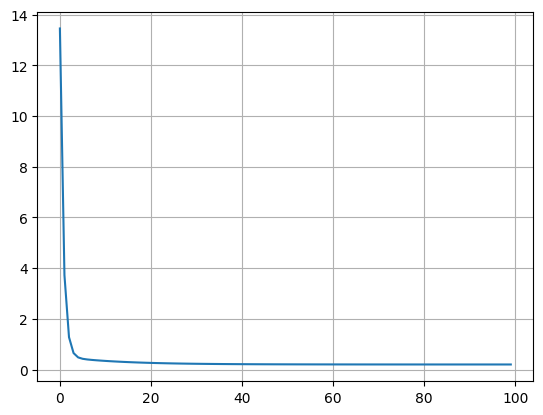

In [35]:
# Gradient descent to minimize the loss of linear regression

lr = 0.01
phi0 = 1.6
phi1 = 0.8
loss = []
indices = []
phi0List = []
phi1List = []

for i in range(100):
    indices.append(i)
    phi0List.append(phi0)
    phi1List.append(phi1)

    # Forward pass
    curLoss = compute_loss(x, y, phi0, phi1)
    line = f(x, phi0, phi1)

    # Backward pass
    gradPhi0 = 2*sum((ypred-ygt) for ypred, ygt in zip(line, y))
    gradPhi1 = 2*sum((ypred-ygt)*xi for ypred, ygt, xi in zip(line, y, x))
    phi0 += -lr*gradPhi0
    phi1 += -lr*gradPhi1
    
    loss.append(curLoss)

plt.plot(indices, loss)
plt.grid()

print("Phi0: ", phi0)
print("Phi1: ", phi1)
print("Final loss: ", loss[len(loss)-1])

finalPhi0_1 = phi0
finalPhi1_1 = phi1

In [36]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

# Make a 2D array for the losses
all_losses = np.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])

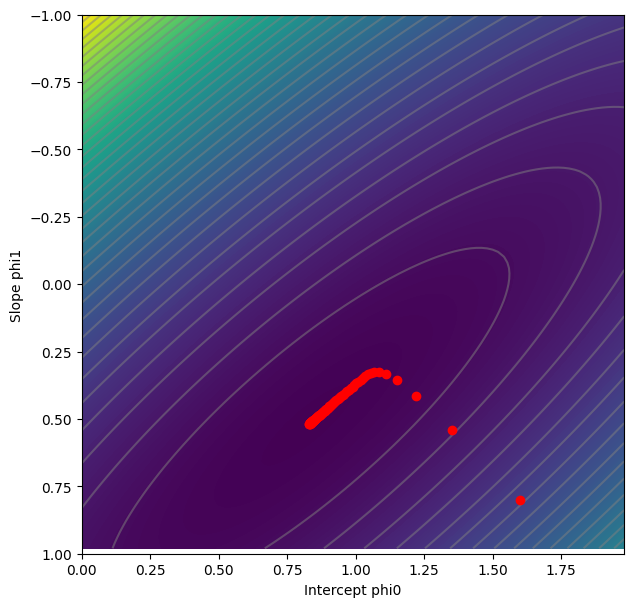

In [37]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept phi0')
ax.set_ylabel(r'Slope phi1')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
for p0, p1 in zip(phi0List, phi1List):
    ax.plot(p0,p1,'ro')
plt.show()
     

In [38]:
def f2(y, phi0, phi1):
    return phi0 + phi1*y

def compute_loss2(x, y, phi0, phi1):
    line = f2(y, phi0, phi1)
    loss = sum((xpred-xgt)**2 for xpred, xgt in zip(line, x))
    return loss
    

Phi0:  -1.19966263128582
Phi1:  1.6261691968191072
Final loss:  0.6231683883372814


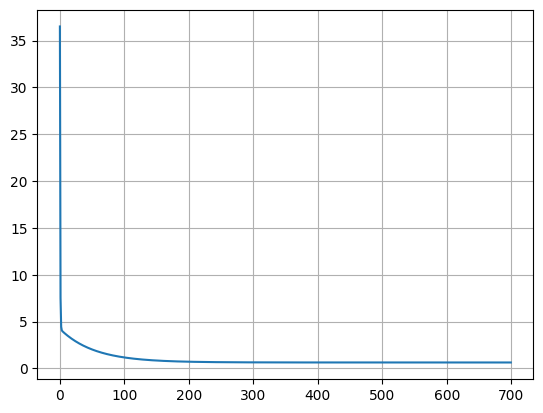

In [45]:
# For problem 2.3

lr = 0.01
phi0 = 1.6
phi1 = 0.8
loss = []
indices = []
phi0List = []
phi1List = []

for i in range(700):
    indices.append(i)
    phi0List.append(phi0)
    phi1List.append(phi1)

    # Forward pass
    curLoss = compute_loss2(x, y, phi0, phi1)
    line = f2(y, phi0, phi1)

    # Backward pass
    gradPhi0 = 2*sum((xpred-xgt) for xpred, xgt in zip(line, x))
    gradPhi1 = 2*sum((xpred-xgt)*yi for xpred, xgt, yi in zip(line, x, y))
    phi0 += -lr*gradPhi0
    phi1 += -lr*gradPhi1
    
    loss.append(curLoss)

plt.plot(indices, loss)
plt.grid()

print("Phi0: ", phi0)
print("Phi1: ", phi1)
print("Final loss: ", loss[len(loss)-1])

finalPhi0_2 = phi0
finalPhi1_2 = phi1


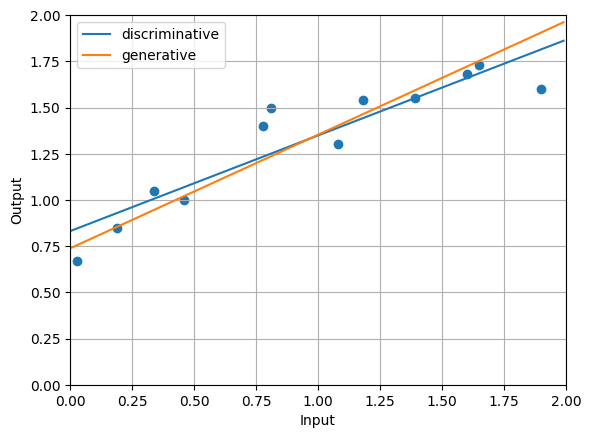

In [49]:
fig,ax = plt.subplots()
ax.scatter(x,y)
plt.xlim([0,2.0])
plt.ylim([0,2.0])
ax.set_xlabel('Input')
ax.set_ylabel('Output')
x_line = np.arange(0,2,0.01)
yFinal1 = finalPhi0_1 + x_line*finalPhi1_1
yFinal2 = (x_line-finalPhi0_2)/finalPhi1_2
plt.plot(x_line, yFinal1, label='discriminative')
plt.plot(x_line, yFinal2, label='generative')
ax.legend()
plt.grid()